<a href="https://colab.research.google.com/github/adrianramadhan/klasifikasi-gambar/blob/master/Klasifikasi_Gambar_Fix_(Adrian_Ramadhan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Proyek Akhir : Klasifikasi Gambar**
### Nama = Adrian Ramadhan
### Email = adrianramadhan881@gmail.com

In [ ]:
# import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import shutil
print(tf.__version__)

2.4.1


In [ ]:
# download dataset & package tambahan
!wget --no-check-certificate / https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

/: Scheme missing.
--2022-06-22 02:49:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2022-06-22 02:49:33 ERROR 404: The specified resource does not exist..



In [ ]:
# download splitter folder
!pip install split-folders

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
# membagi folders
import splitfolders
splitfolders.ratio ("/tmp/rockpaperscissors/rps-cv-images", output= "/tmp/rockpaperscissors/", seed = 2188, ratio= (.6, .4))

Copying files: 2188 files [00:00, 3193.52 files/s]


In [ ]:
# membuat direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat train dir
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

In [ ]:
# membuat validation dir
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
os.listdir('/tmp/rockpaperscissors/train')

['paper', 'scissors', 'rock']

In [ ]:
os.listdir('/tmp/rockpaperscissors/val')

['paper', 'scissors', 'rock']

In [ ]:
# membuat image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest',)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest',)

In [ ]:
# membuat generator classifier
train_generator = train_datagen.flow_from_directory(
                  train_dir, # directory data latih
                  target_size=(150,150), #mengubah resolusi seluruh gambar menjadi 150px
                  batch_size=32,
                  # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
                  class_mode='categorical',)

validation_generator = test_datagen.flow_from_directory(
                  validation_dir, # direktori data validasi
                  target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
                  batch_size=32, 
                  # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
                  class_mode='categorical',)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membuat layer CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    #menggunakan softmax untuk klasifikasi 3 kelas
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# menambahkan optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# melatih model dengan model.fit
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      shuffle=True,
      verbose=1)

Epoch 1/15
41/41 [==============================] - 108s 3s/step - loss: 1.1295 - accuracy: 0.3929 - val_loss: 0.5859 - val_accuracy: 0.7854
Epoch 2/15
41/41 [==============================] - 106s 3s/step - loss: 0.5482 - accuracy: 0.7956 - val_loss: 0.2560 - val_accuracy: 0.9110
Epoch 3/15
41/41 [==============================] - 106s 3s/step - loss: 0.2830 - accuracy: 0.9017 - val_loss: 0.3144 - val_accuracy: 0.8927
Epoch 4/15
41/41 [==============================] - 106s 3s/step - loss: 0.2702 - accuracy: 0.8960 - val_loss: 0.1671 - val_accuracy: 0.9463
Epoch 5/15
41/41 [==============================] - 106s 3s/step - loss: 0.1989 - accuracy: 0.9266 - val_loss: 0.1601 - val_accuracy: 0.9532
Epoch 6/15
41/41 [==============================] - 106s 3s/step - loss: 0.1389 - accuracy: 0.9555 - val_loss: 0.2019 - val_accuracy: 0.9247
Epoch 7/15
41/41 [==============================] - 106s 3s/step - loss: 0.1796 - accuracy: 0.9326 - val_loss: 0.1379 - val_accuracy: 0.9589
Epoch 8/15
41

Saving Tangann.jpeg to Tangann.jpeg
(1, 150, 150, 3)
Tangann.jpeg
[[0. 1. 0.]]
Tangan anda berbentuk batu


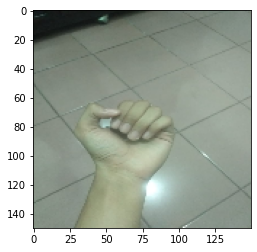

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # menambahkan 1 dimensi, axis menunjukkan jumlah kelas 

    images = np.vstack([x]) 
    print (images.shape)
    classes = model.predict(images, batch_size=10)
  
    print(fn)
    print(classes)
    max = np.argmax(classes[0])

    if max == 0:
      print("Tangan anda berbentuk kertas")
    elif max == 1:
      print("Tangan anda berbentuk batu")
    elif max == 2:
      print("Tangan anda berbentuk gunting")
    else:
      print("Tidak masuk dataset")